In [13]:
'''
THIS IS THE COPIED IMPLEMENTATION FROM SECTION 1 - K-MEANS CLUSTERING. TO BE USED FOR THE CASE STUDY
'''

import numpy as np
import matplotlib.pyplot as plt
import math
import copy
import random


def euclidean_distance(point1, point2):
    if len(point1) != len(point2):
        raise ValueError("Both points must have the same number of dimensions.")

    squared_differences = [(x - y) ** 2 for x, y in zip(point1, point2)]
    return math.sqrt(sum(squared_differences))


def plot_clusters_with_countries(data, clusters, centroids, iteration, title, save_as=None):
    plt.figure(figsize=(20, 20))
    colors = ['red', 'blue', 'green', 'orange', 'purple']
    markers = ['o', 's', '^', 'D', '*']

    # Plot each cluster
    for i, (centroid, points) in enumerate(clusters.items()):
        points_coords = np.array([point[1] for point in points])  # Extract coordinates
        if len(points_coords) > 0:
            plt.scatter(points_coords[:, 0], points_coords[:, 1], color=colors[i % len(colors)], label=f'Cluster #{i+1}')

        # Plot centroids
        plt.scatter(centroid[0], centroid[1], color=colors[i % len(colors)], marker='x', s=200, linewidths=3, label=f'Centroid #{i+1}')

        # Annotate points with country names
        for country, point in points:
            plt.annotate(country, (point[0], point[1]), textcoords="offset points", xytext=(5, 5), ha='center')

    plt.title(f"{title} (Iteration {iteration})")
    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
    plt.grid(color='gray', linestyle='--', linewidth=0.5)
    plt.legend()

    if save_as:
        plt.savefig(save_as, format='png')
    plt.show()



def kmeans_clustering(data, k, countries, initial_centroids=None, max_iterations=100, visualize=False, save_plots=False):
    if initial_centroids is None:
        initial_centroids = random.choices(data, k=k)

    current_centroids = copy.deepcopy(initial_centroids)
    all_iterations = {}

    for i in range(max_iterations):
        ##################################################################
        # Form K clusters by assigning all points to the closest centroid
        clusters = {tuple(c): [] for c in current_centroids}

        for idx, point in enumerate(data):
            distances = [euclidean_distance(point, centroid) for centroid in current_centroids]
            closest_centroid = current_centroids[np.argmin(distances)]
            clusters[tuple(closest_centroid)].append((countries[idx], point))  # Associate country with point

        # Save iteration data
        all_iterations[f"iteration-{i+1}"] = copy.deepcopy(current_centroids)

        # Visualize if needed
        # if visualize:
        #     plot_clusters_with_countries(data, clusters, current_centroids, i+1, "Clustering")

        #############################################################
        # Recompute the centroid of each cluster using `mean` method
        new_centroids = []
        for centroid in clusters.keys():
            if clusters[centroid]:
                points_only = [point[1] for point in clusters[centroid]]  # Extract just the coordinates
                new_centroids.append(list(np.mean(points_only, axis=0)))
            else:
                new_centroids.append(list(centroid))  # Keep unchanged if no points assigned

        ######################################################################################
        # If the current_centroid tends to converge to the new_centroids, break the iteration
        if np.allclose(current_centroids, new_centroids):
            break

        current_centroids = new_centroids

    # Visualize if needed
    if visualize:
        plot_clusters_with_countries(data, clusters, current_centroids, i+1, "Clustering")

    sse = sum(
        sum(euclidean_distance(point[1], centroid) ** 2 for point in points)
        for centroid, points in clusters.items()
    )

    # Print final cluster assignments with country names
    print("Final Clusters:")
    for cluster_id, (centroid, points) in enumerate(clusters.items()):
        print(f"\nCluster {cluster_id + 1} (Centroid: {centroid}):")
        for country, point in points:
            print(f"  - {country}: {point}")

    return current_centroids, clusters, sse, all_iterations



In [14]:
'''
THIS IS THE COPIED IMPLEMENTATION FROM SECTION 2 - HIERACHICAL CLUSTERING. TO BE USED FOR THE CASE STUDY
'''

import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt


# Hierarchical Clustering: Single Linkage
def hierarchical_clustering_single(data, labels):
    """
    Perform hierarchical clustering using single linkage and generate a dendrogram.

    :param data : 1D list representing the compact distance matrix
    :return     : None (displays the dendrogram)
    """
    # Perform single linkage clustering
    Z = linkage(data, method='single')

    # Plot the dendrogram
    plt.figure(figsize=(15, 10))
    dendrogram(Z, labels=labels)
    plt.title("Hierarchical Clustering - Single Linkage")
    plt.xlabel("Points")
    plt.ylabel("Distance")
    plt.show()

# Hierarchical Clustering: Complete Linkage
def hierarchical_clustering_complete(data, labels):
    """
    Perform hierarchical clustering using complete linkage and generate a dendrogram.

    :param data : 1D list representing the compact distance matrix
    :return     : None (displays the dendrogram)
    """
    # Perform complete linkage clustering
    Z = linkage(data, method='complete')

    # Plot the dendrogram
    plt.figure(figsize=(15, 10))
    dendrogram(Z, labels=labels)
    plt.title("Hierarchical Clustering - Complete Linkage")
    plt.xlabel("Points")
    plt.ylabel("Distance")
    plt.show()

[[np.float64(2.9130245873965874), np.float64(-0.0956205755055116)], [np.float64(-0.42991132993193854), np.float64(0.5881556664216987)], [np.float64(0.285225077370054), np.float64(0.45517441333976766)], [np.float64(2.9324226542292737), np.float64(-1.6955550705215485)], [np.float64(-1.0335758664708325), np.float64(-0.13665870884235132)], [np.float64(-0.022407261573744057), np.float64(1.779186575829488)], [np.float64(0.10158373658107363), np.float64(0.5682517238414163)], [np.float64(-2.342164609685882), np.float64(1.9884591539619922)], [np.float64(-2.9737636642043057), np.float64(0.7346886586078284)], [np.float64(0.18148699731199228), np.float64(0.4028658734836359)], [np.float64(-1.2687438639868238), np.float64(0.6565883632526902)], [np.float64(-1.6709963959114877), np.float64(-0.5611624925384963)], [np.float64(1.1238509345045715), np.float64(0.9613974045352939)], [np.float64(-1.0813741969947284), np.float64(0.4819695301363481)], [np.float64(-0.580025152239952), np.float64(-0.535326833980

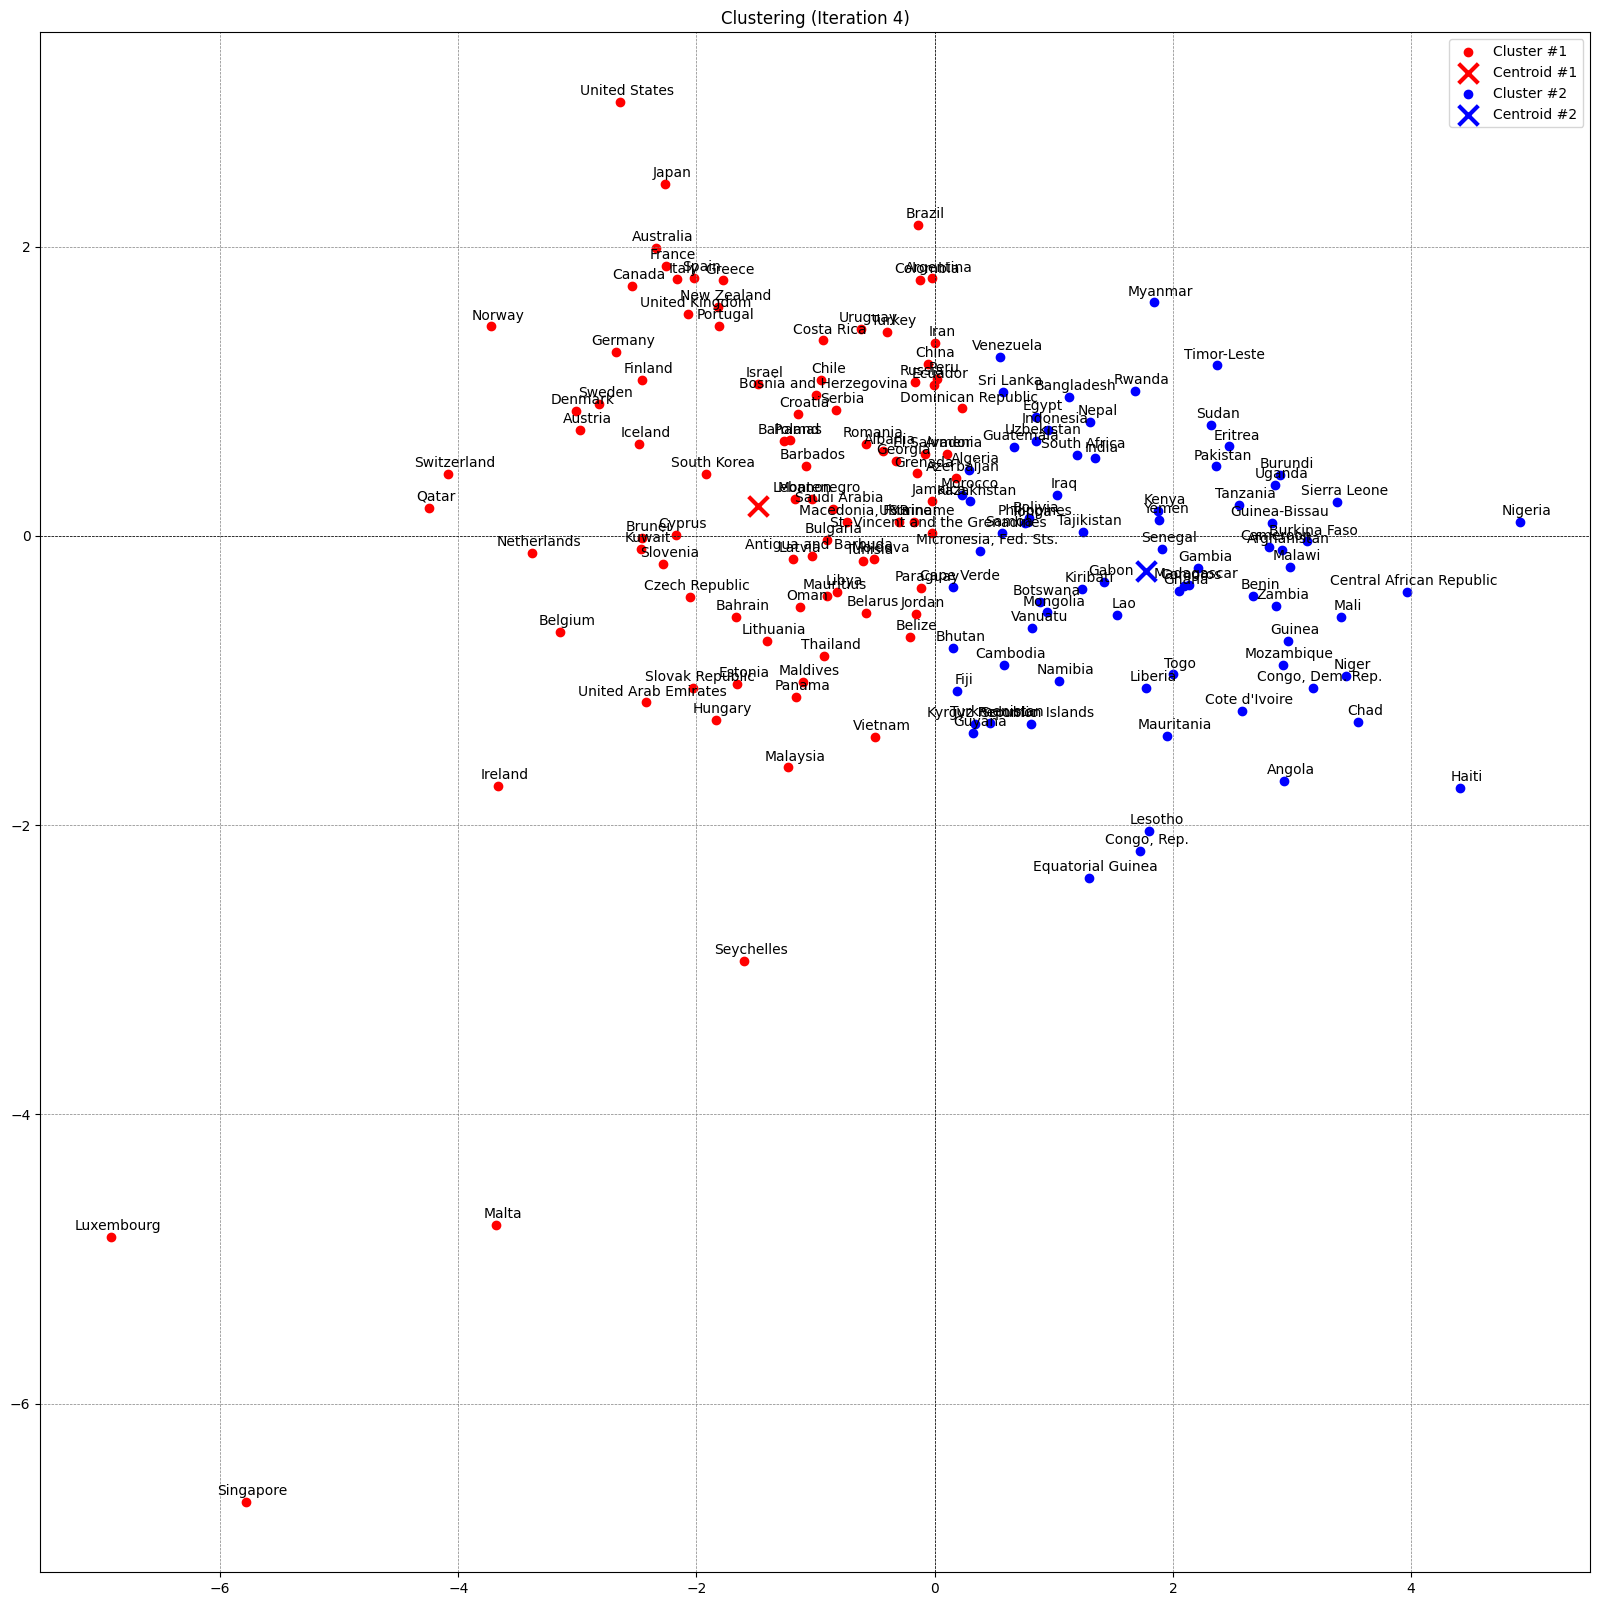

Final Clusters:

Cluster 1 (Centroid: (np.float64(-1.4791003647459189), np.float64(0.20517084101247585))):
  - Albania: [np.float64(-0.42991132993193854), np.float64(0.5881556664216987)]
  - Antigua and Barbuda: [np.float64(-1.0335758664708325), np.float64(-0.13665870884235132)]
  - Argentina: [np.float64(-0.022407261573744057), np.float64(1.779186575829488)]
  - Armenia: [np.float64(0.10158373658107363), np.float64(0.5682517238414163)]
  - Australia: [np.float64(-2.342164609685882), np.float64(1.9884591539619922)]
  - Austria: [np.float64(-2.9737636642043057), np.float64(0.7346886586078284)]
  - Azerbaijan: [np.float64(0.18148699731199228), np.float64(0.4028658734836359)]
  - Bahamas: [np.float64(-1.2687438639868238), np.float64(0.6565883632526902)]
  - Bahrain: [np.float64(-1.6709963959114877), np.float64(-0.5611624925384963)]
  - Barbados: [np.float64(-1.0813741969947284), np.float64(0.4819695301363481)]
  - Belarus: [np.float64(-0.580025152239952), np.float64(-0.5353268339800482)]


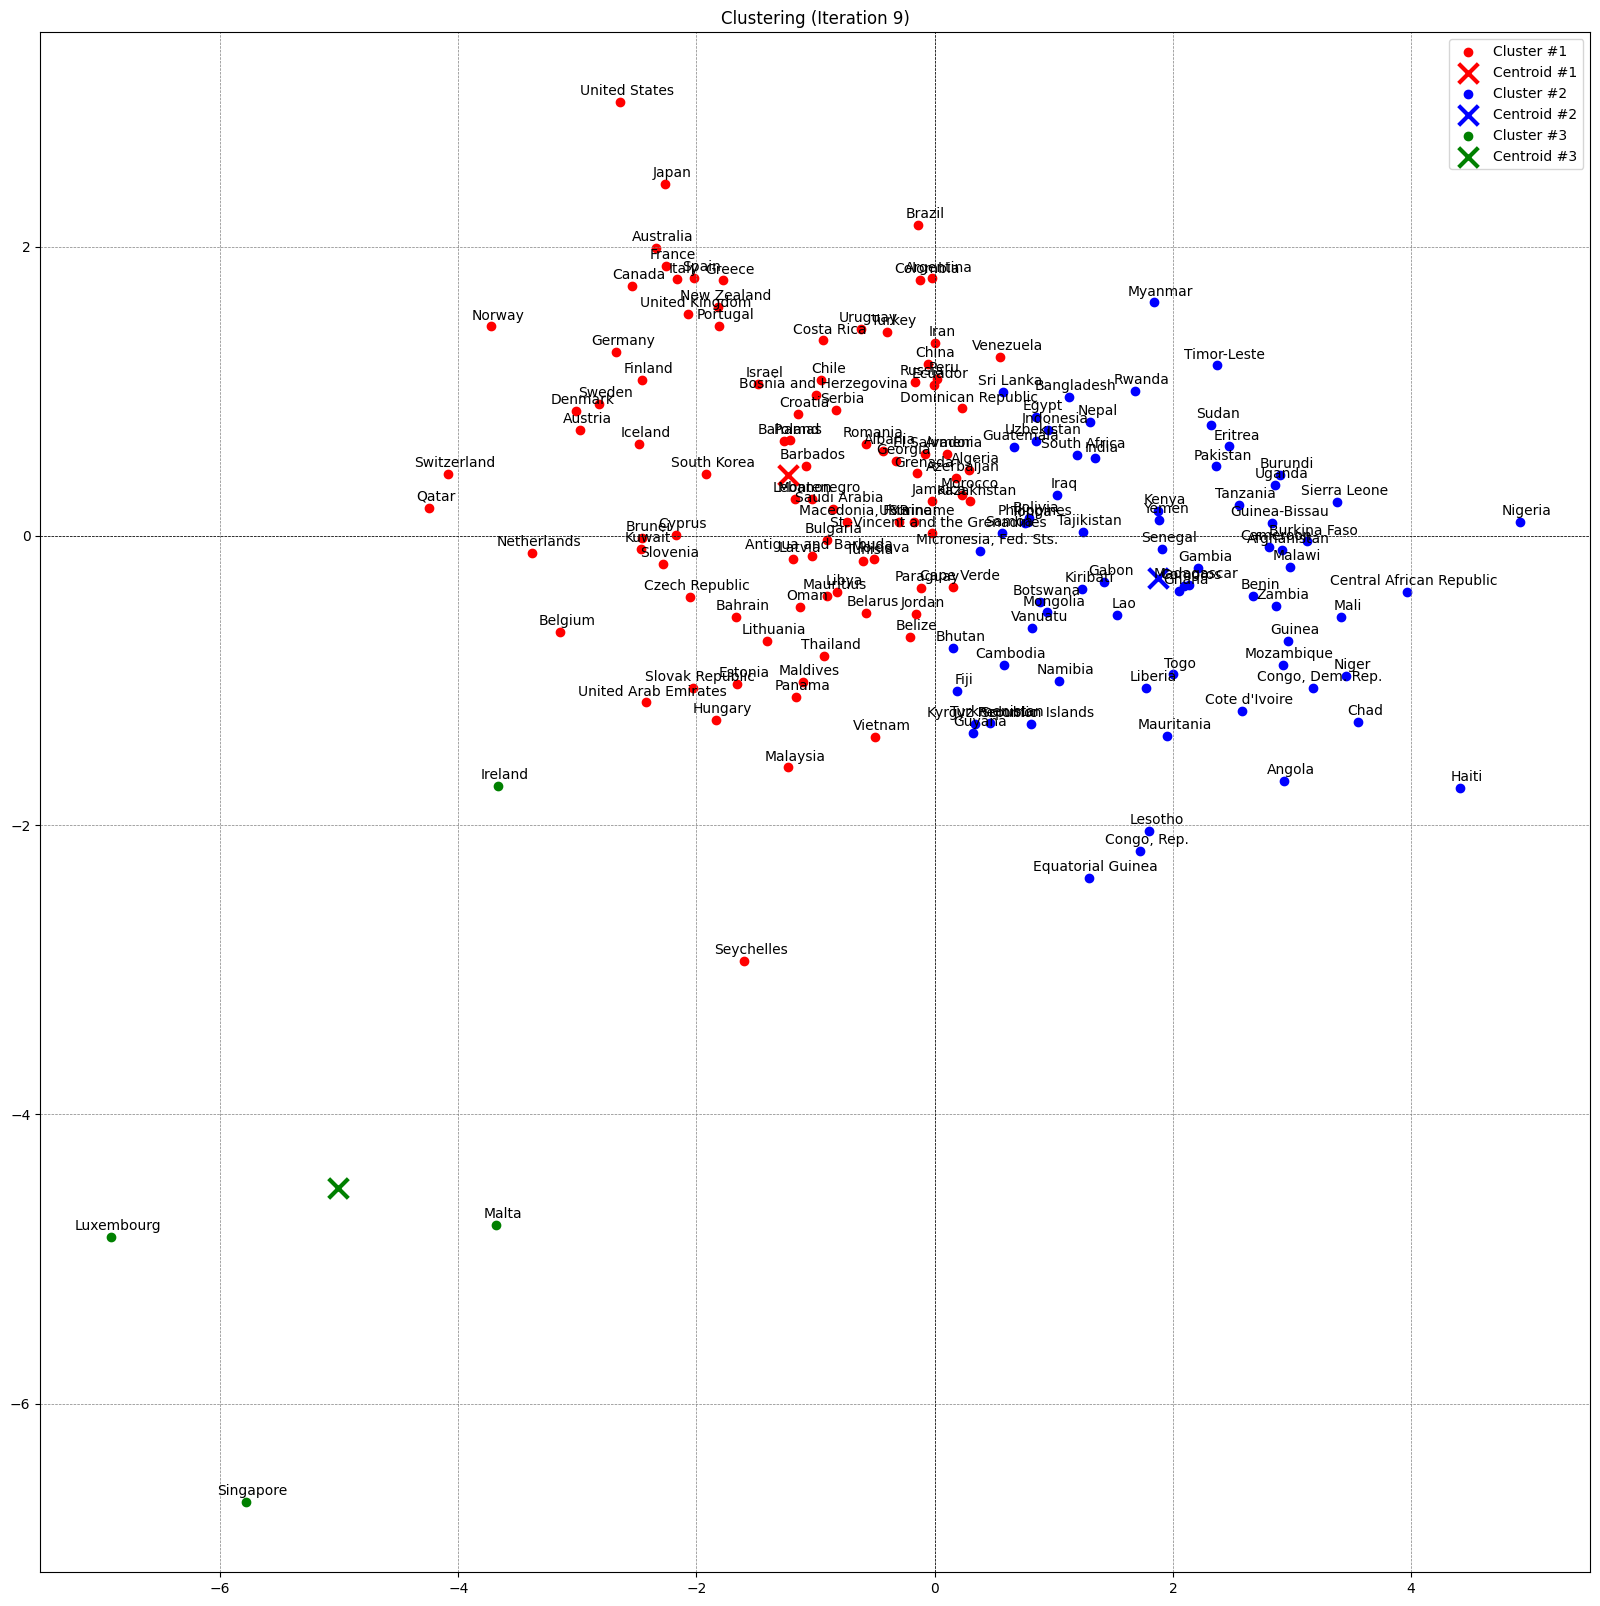

Final Clusters:

Cluster 1 (Centroid: (np.float64(-1.2285929624310752), np.float64(0.4190634571928872))):
  - Albania: [np.float64(-0.42991132993193854), np.float64(0.5881556664216987)]
  - Algeria: [np.float64(0.285225077370054), np.float64(0.45517441333976766)]
  - Antigua and Barbuda: [np.float64(-1.0335758664708325), np.float64(-0.13665870884235132)]
  - Argentina: [np.float64(-0.022407261573744057), np.float64(1.779186575829488)]
  - Armenia: [np.float64(0.10158373658107363), np.float64(0.5682517238414163)]
  - Australia: [np.float64(-2.342164609685882), np.float64(1.9884591539619922)]
  - Austria: [np.float64(-2.9737636642043057), np.float64(0.7346886586078284)]
  - Azerbaijan: [np.float64(0.18148699731199228), np.float64(0.4028658734836359)]
  - Bahamas: [np.float64(-1.2687438639868238), np.float64(0.6565883632526902)]
  - Bahrain: [np.float64(-1.6709963959114877), np.float64(-0.5611624925384963)]
  - Barbados: [np.float64(-1.0813741969947284), np.float64(0.4819695301363481)]
  

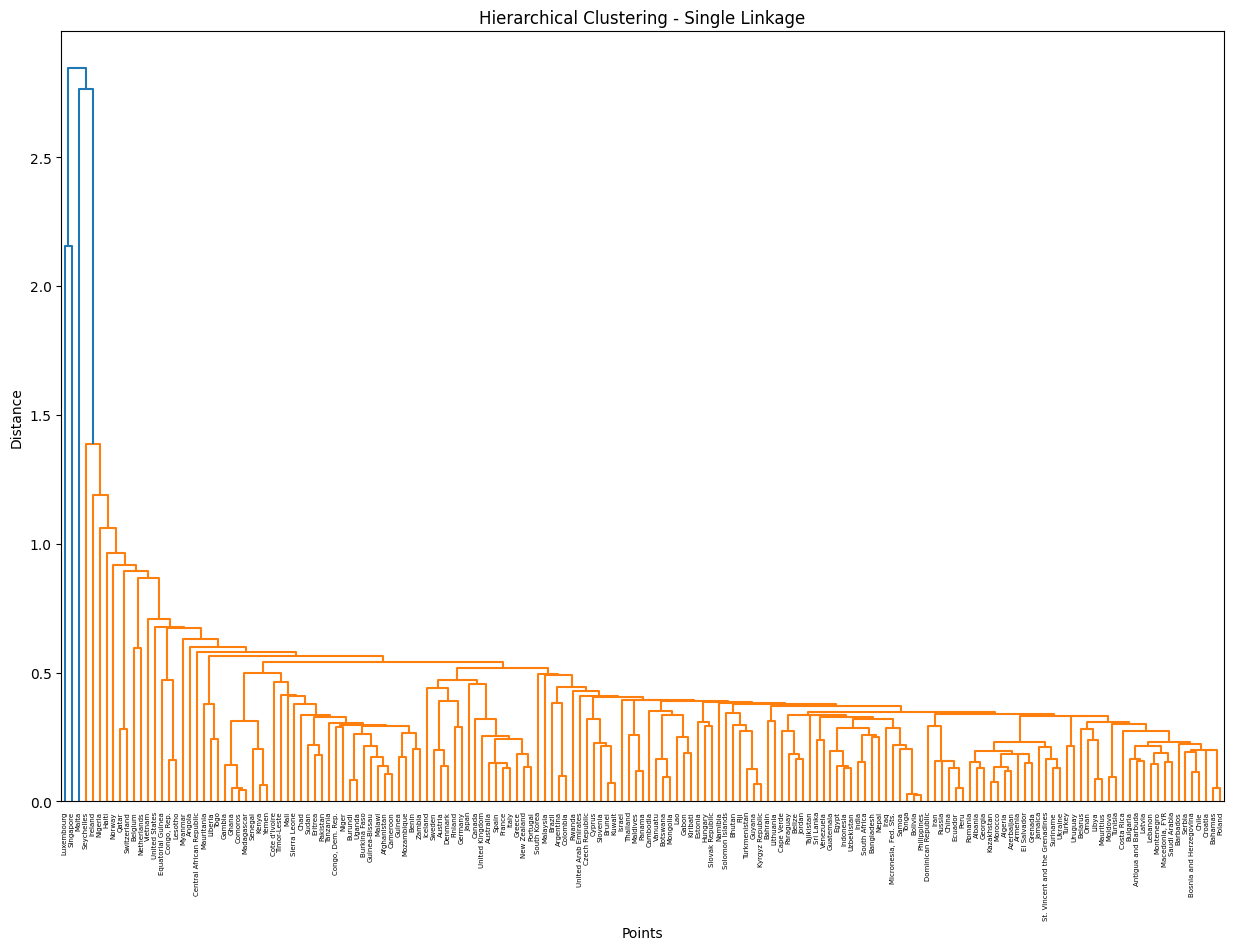

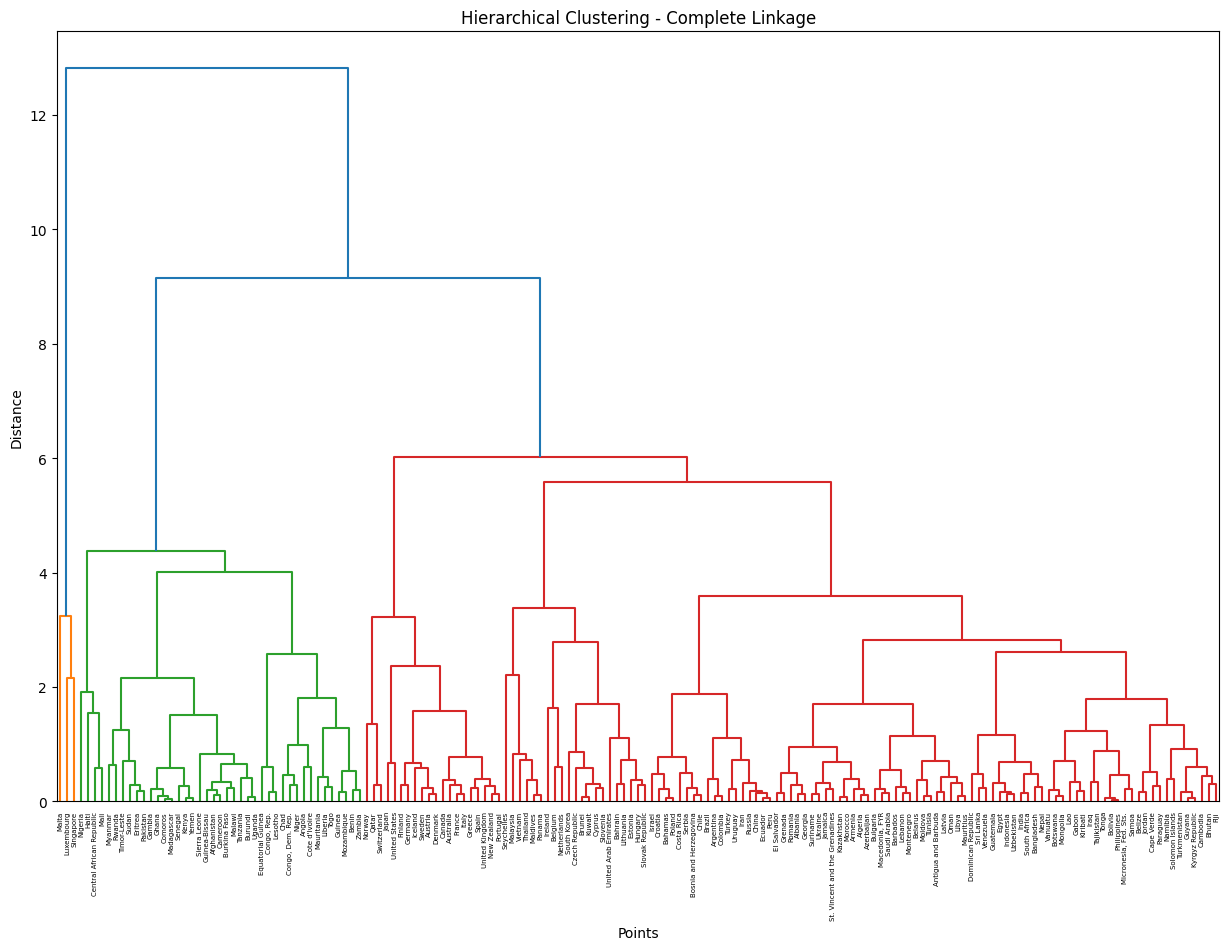

In [15]:
'''
CASE STUDY: COUNTRY ANALYSIS
'''

from numpy import array, identity, transpose, matmul, std, mean
from numpy.linalg import eig
import csv

###############
# PREPARE DATA

# Load data from CSV
def load_data(filename):
    countries = []
    data_country = []

    with open(filename, 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            countries.append(row['country'])  # Assuming the 'country' column contains country names
            data_country.append([
                float(row['child_mort']),
                float(row['exports']),
                float(row['health']),
                float(row['imports']),
                float(row['income']),
                float(row['inflation']),
                float(row['life_expec']),
                float(row['total_fer']),
                float(row['gdpp'])
            ])

    return countries, array(data_country)

# Example Usage
filename = 'Country-data.csv'
countries, data_country = load_data(filename)

X = array(data_country)
# Le nombre de points
n = len(countries)
# Le nombre de variables
p = len(data_country[0])
# La matrice des donn´ees centr´ees, c’est-`a-dire la somme = 0 sur chaque colonne
Y = X - matmul(transpose(array([n * [1]])), transpose(array([[mean(variable)] for variable in transpose(X)])))
# La matrice des donn´ees centr´ees et r´eduites, qui en plus a l’´ecart type constant = 1 sur chaque colonne
Z = matmul (Y, array(list(map (lambda variable : [1./std(variable)], transpose(X)))) * identity(p))
# La matrice (sym´etrique) de variance/covariance des donn´ees centr´ees r´eduites
R = matmul (matmul(transpose(Z), 1./n * identity (n)), Z)
# Les vecteurs propres de R
eigenvectors = eig(R)[1]
# Les 2 composantes principals = 2 nouvelles variables contenant le plus d’information possible des 9 variables initiales
components = [matmul(Z, eigenvectors[:,0]), matmul(Z, eigenvectors[:,1])]
# La matrice initiale, projet´ee sur 2 nouvelles colonnes qui repr´esentent les 2 composantes principales
data_reduced = [[components[0][i], components[1][i]] for i in range(n)]

print(data_reduced)

##################
# K-means ANALYSE
kmeans_clustering(data_reduced, 2, countries=countries, visualize=True, save_plots=False)
kmeans_clustering(data_reduced, 3, countries=countries, visualize=True, save_plots=False)

######################
# Single link ANALYSE
hierarchical_clustering_single(data_reduced, labels=countries)

########################
# Complete link ANALYSE
hierarchical_clustering_complete(data_reduced, labels=countries)